# <b> <span style="font-weight: 650; font-size: 52px;"> HOUSE PRICE ESTIMATOR </span></b>


<img src="image2.webp" style="width: 100%; height: 100%;">

### <b> <span style="font-weight: 500; font-size: 40px;"> EXPLOTARY DATA ANALYSIS </span></b>
  
  * Data Visiualization

  * Data Cleaning

  * Correletinary Analysis

  * Descriptive Statistics (such as distrubution of house values
                            against target feature)

$$ \hspace{1cm}  $$

### <b> <span style="font-weight: 500; font-size: 40px;"> MODELING AND TUNING </span></b> 

  * After all the things that i mention, i will try different
  models on data and tune the best one.
  
  * Models that i will use are XGBOOST Regressor and Linear Regression. 

$$ \hspace{1cm}  $$

### <b> <span style="font-weight: 500; font-size: 40px;"> HYPOTHESIS </span></b>

* Rich people have extended family against poor people

$$ \hspace{1cm}  $$

## <b> <span style="font-weight: 600; font-size: 42px;"> IMPORTING PACKAGES </span></b> 

In [38]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import sklearn

%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV,LinearRegression
from sklearn import metrics

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


$$ \hspace{1cm}  $$
## <b> <span style="font-weight: 600; font-size: 42px;"> DATA VISIUALIZATION </span></b> 
$$ \hspace{1cm}  $$

In [76]:
df=pd.read_csv('C:\\Users\\benon\\Desktop\\python\\Pandas\\HousePrice\\housing.csv')

In [77]:
df_big=df.copy()
df_big.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Distrubutions of home communities with their locations

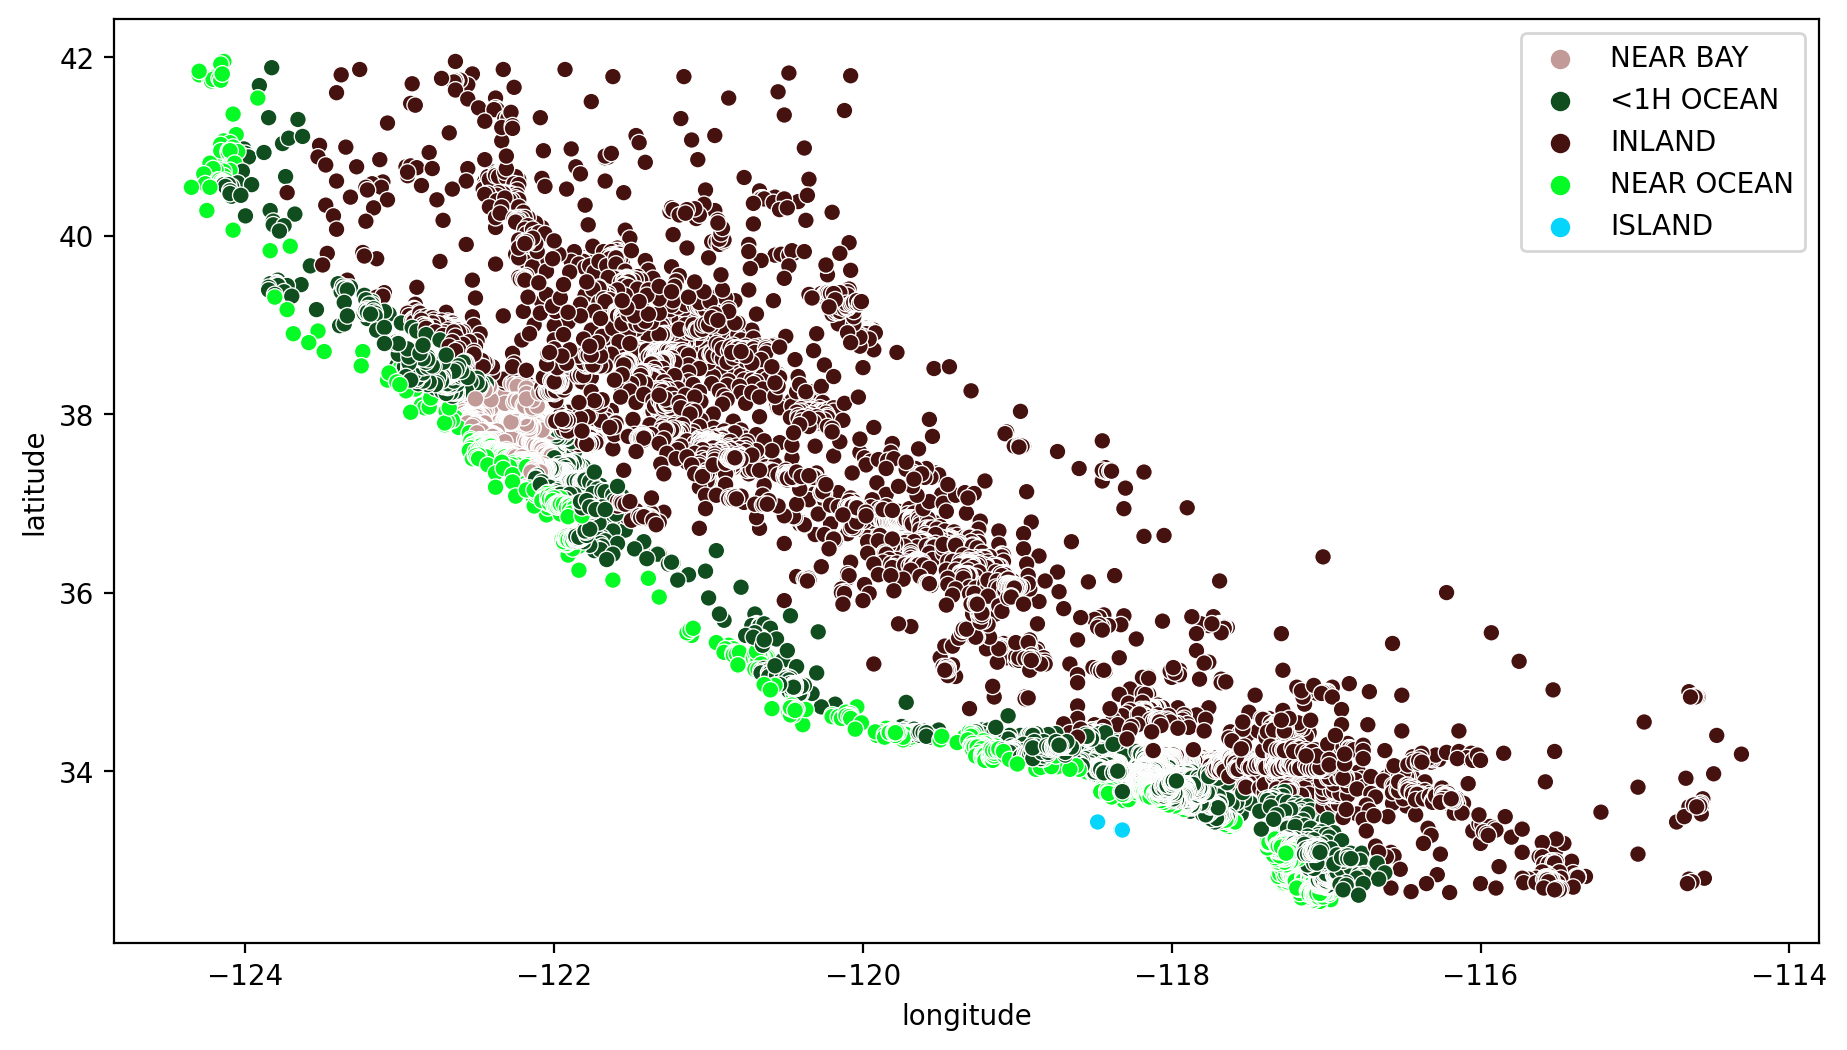

In [40]:
fig,ax=plt.subplots(figsize=(11,6))

blue='#05D5FA'
darkgreen='#114E1F'
green='#05FA26'
sand='#C29A98'
darkb='#461210'
sns.scatterplot(data=df_big,x='longitude',y='latitude',ax=ax,marker='o',
                hue='ocean_proximity',
                palette=[sand,darkgreen,darkb,green,blue]
                )
ax.legend()

$$ \hspace{1cm}  $$
## <b> <span style="font-weight: 600; font-size: 42px;"> CORRELINEARITY ANALYSIS </span></b> 
$$ \hspace{1cm}  $$
$\Rightarrow$  We will examine the correlations between features in the data

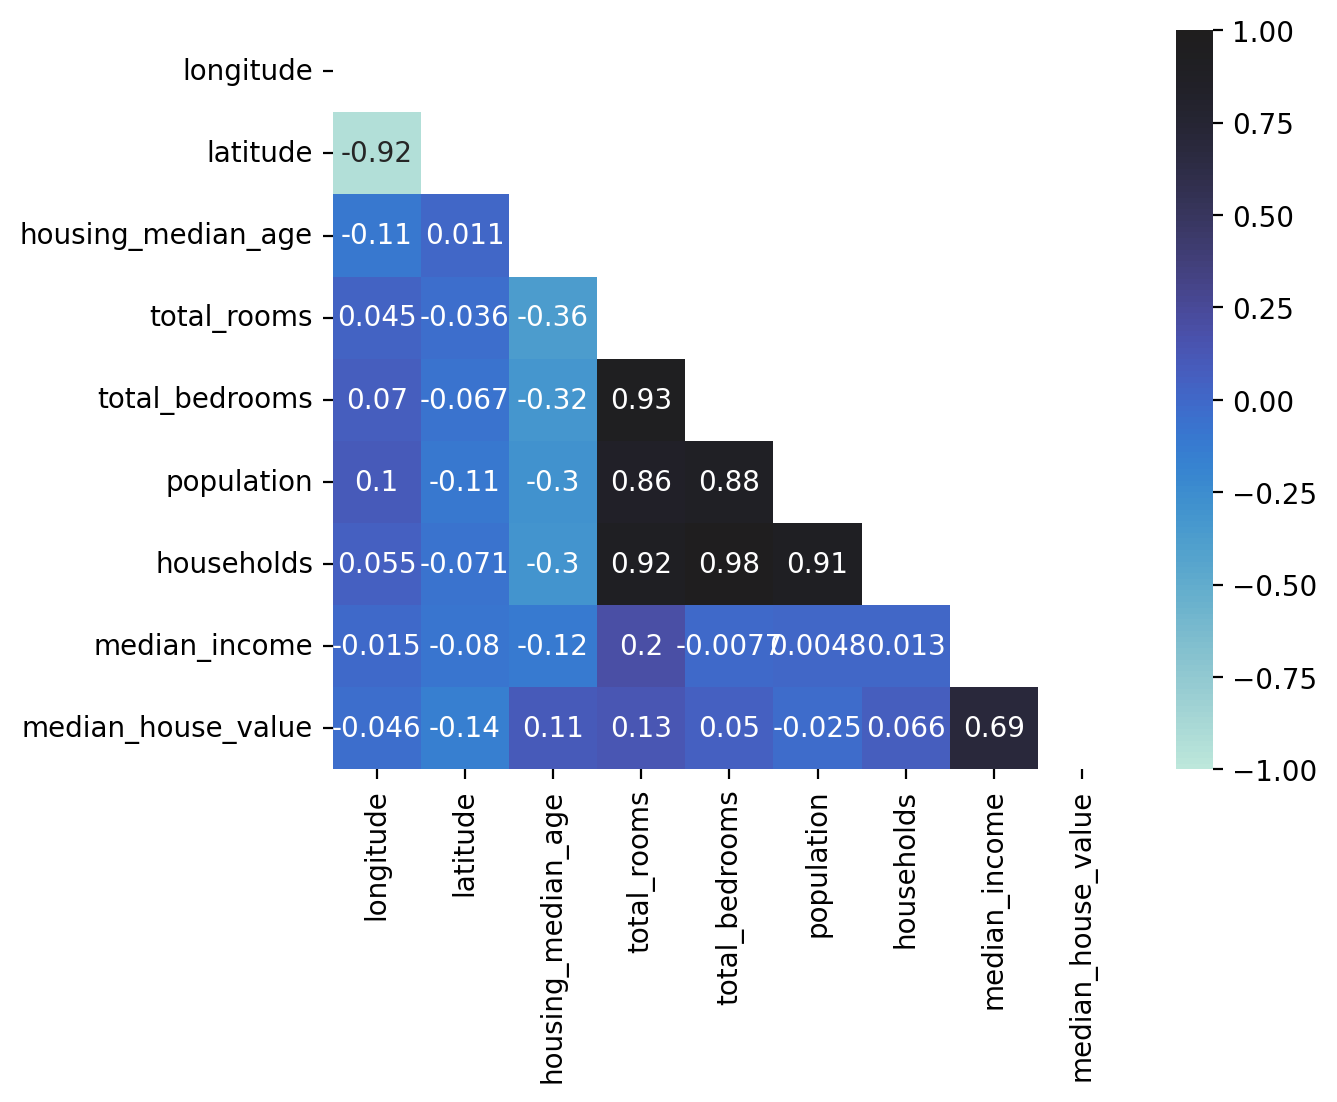

In [41]:
def corr_map(data):
    """
        data: data that we 
        want to create correlations
        among its' features
        
        return : 
        heatmap
        
    """
    
    #We are masking the upper triangle of correlation matrix to get 
    #more smooth demonstration
    mask=np.zeros_like(data.corr())
    mask[np.triu_indices_from(mask)]=True
    
    #Seaborn's heatmap function to create heatmap
    sns.heatmap(data=data.corr(),vmin=-1,vmax=1,annot=True,mask=mask,center=1)

corr_map(df_big)    

$$ \hspace{1cm}  $$
## <b> <span style="font-weight: 600; font-size: 42px;"> FEATURE ENGINEERING </span></b> 
$$ \hspace{1cm}  $$
$\Rightarrow$  Some features cause multi-collinearity, that will affect our estimations since their domination upon the data is 
supressing other features' dominancy. 
$$ \hspace{0.3cm}  $$

$\Rightarrow$  "households" ,"total_bedrooms" ,"total_rooms" and "population" are highly correlated each other,
we need just one of them so we are subtracting the others. 
$$ \hspace{1cm}  $$

In [42]:
df_clean=df_big.drop(['households','total_bedrooms','total_rooms'],axis=1)


Ocean proximity column has not much unique values creating dummy table 
from it, will make things easier to create a machine learning model

In [43]:
df_clean['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

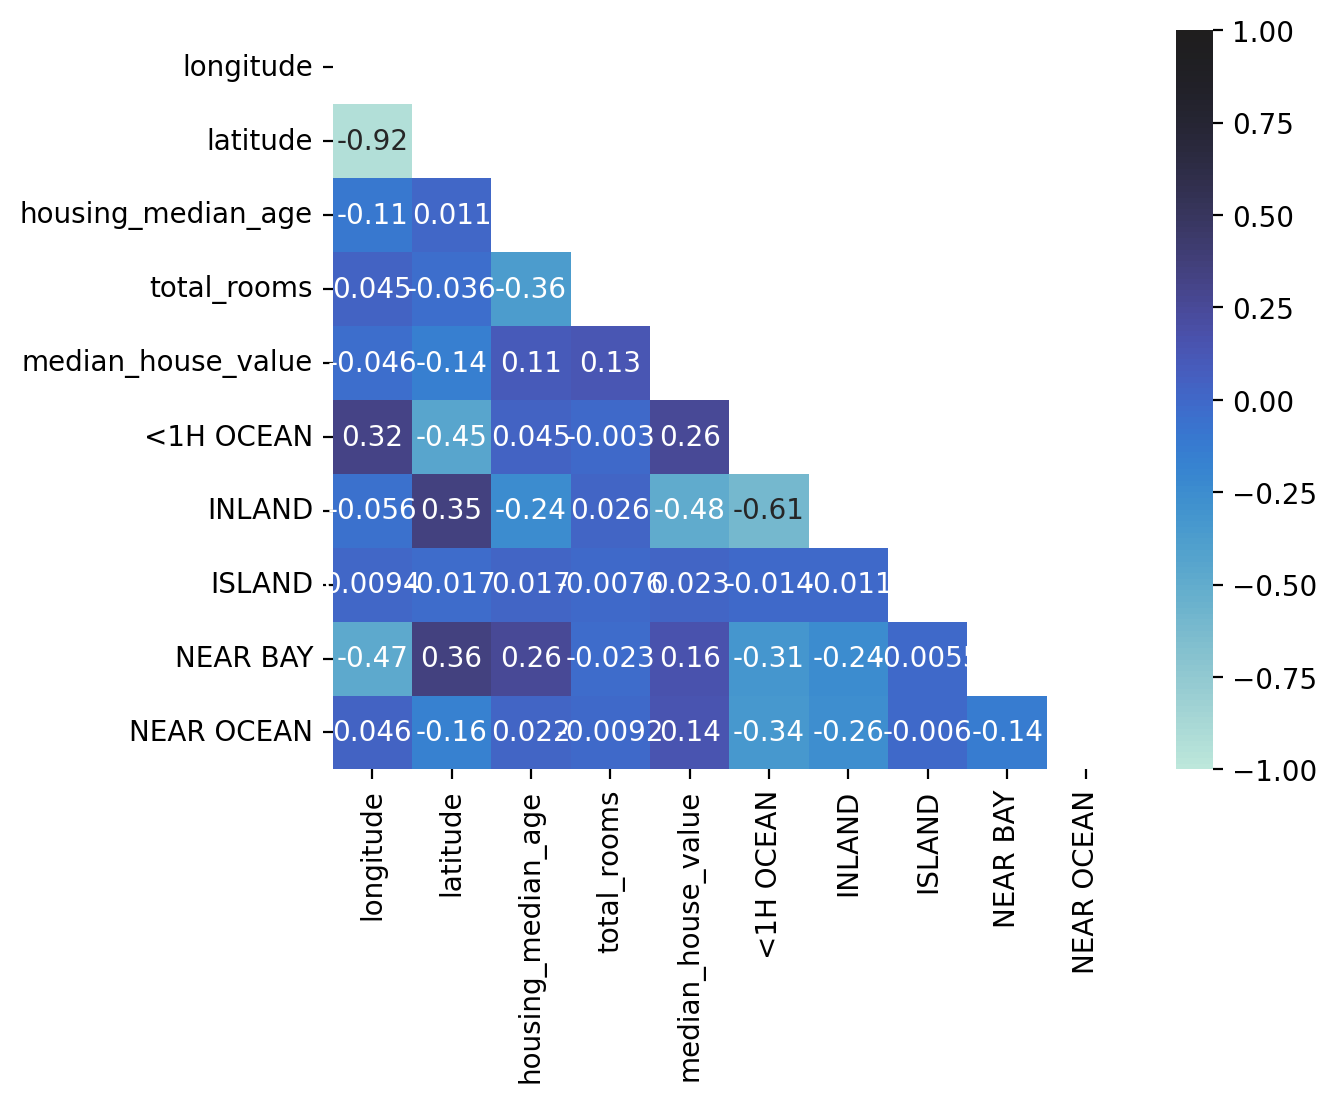

In [44]:
df_ML=pd.concat([df_big.drop(['households','ocean_proximity','total_bedrooms','population','median_income'],axis=1),
                pd.get_dummies(df_big['ocean_proximity'])],axis=1)

corr_map(df_ML)

$$ \hspace{1cm}  $$
## <b> <span style="font-weight: 600; font-size: 42px;"> DESCRIPTIVE STATISTICS </span></b> 
$$ \hspace{1cm}  $$

In [45]:
def info_by_location(df,target):
    
    """
        Summary       :
        
            This function creates histograms for each location 
            which are ocean_proximity values(like neighbourhoods). 
            We subracted that column and spare it to 4 columns for 
            machine learning data, but we will use the old data here
            for understanding the distrubutions of target value in
            these locations
    
        Args     :
        
            df(pd.DataFrame)     : data frame that we will use to statistical analysis
        
            target(Str)          : target feature of the data to analyze it's distrubution
                    respect to ocean_proximity
        
        
        Return                   :       
        
            Distrubutions of target column for each locations  
    
    """

    fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
    
    plt.title(F'{target} FOR ALL LOCATİONS')
    
    ax1=ax[0,0]
    ax2=ax[0,1]
    ax3=ax[1,0]
    ax4=ax[1,1]
    ax5=ax[2,0]
    ax6=ax[2,1]
    groupS=df.groupby('ocean_proximity')
    groupNB=pd.DataFrame(groupS.get_group('NEAR BAY'))
    group1H=pd.DataFrame(groupS.get_group('<1H OCEAN'))
    groupIL=pd.DataFrame(groupS.get_group('INLAND'))
    groupNO=pd.DataFrame(groupS.get_group('NEAR OCEAN'))
    groupIS=pd.DataFrame(groupS.get_group('ISLAND'))


    sns.histplot(data=groupNB, x=F'{target}', kde=True,ax=ax1,
                 color=sand, line_kws={'lw': 3});

    sns.histplot(data=group1H, x=F'{target}', kde=True,ax=ax2,
                 color=darkgreen, line_kws={'lw': 3});

    sns.histplot(data=groupIL, x=F'{target}', kde=True,ax=ax3,
                 color=darkb, line_kws={'lw': 3});

    sns.histplot(data=groupNO, x=F'{target}', kde=True,ax=ax4,
                 color=green, line_kws={'lw': 3});

    sns.histplot(data=groupIS, x=F'{target}', kde=True,ax=ax5,
                 color=blue, line_kws={'lw': 3});

    sns.histplot(data=df, x=F'{target}', kde=True,ax=ax6,
                 color='#3B0BBD', line_kws={'lw': 3});


    ax1.set_title('NEAR BAY')
    ax2.set_title('<1H OCEAN')
    ax3.set_title('INLAND')
    ax4.set_title('NEAR OCEAN')
    ax5.set_title('ISLAND')
    ax6.set_title('GENERAL')

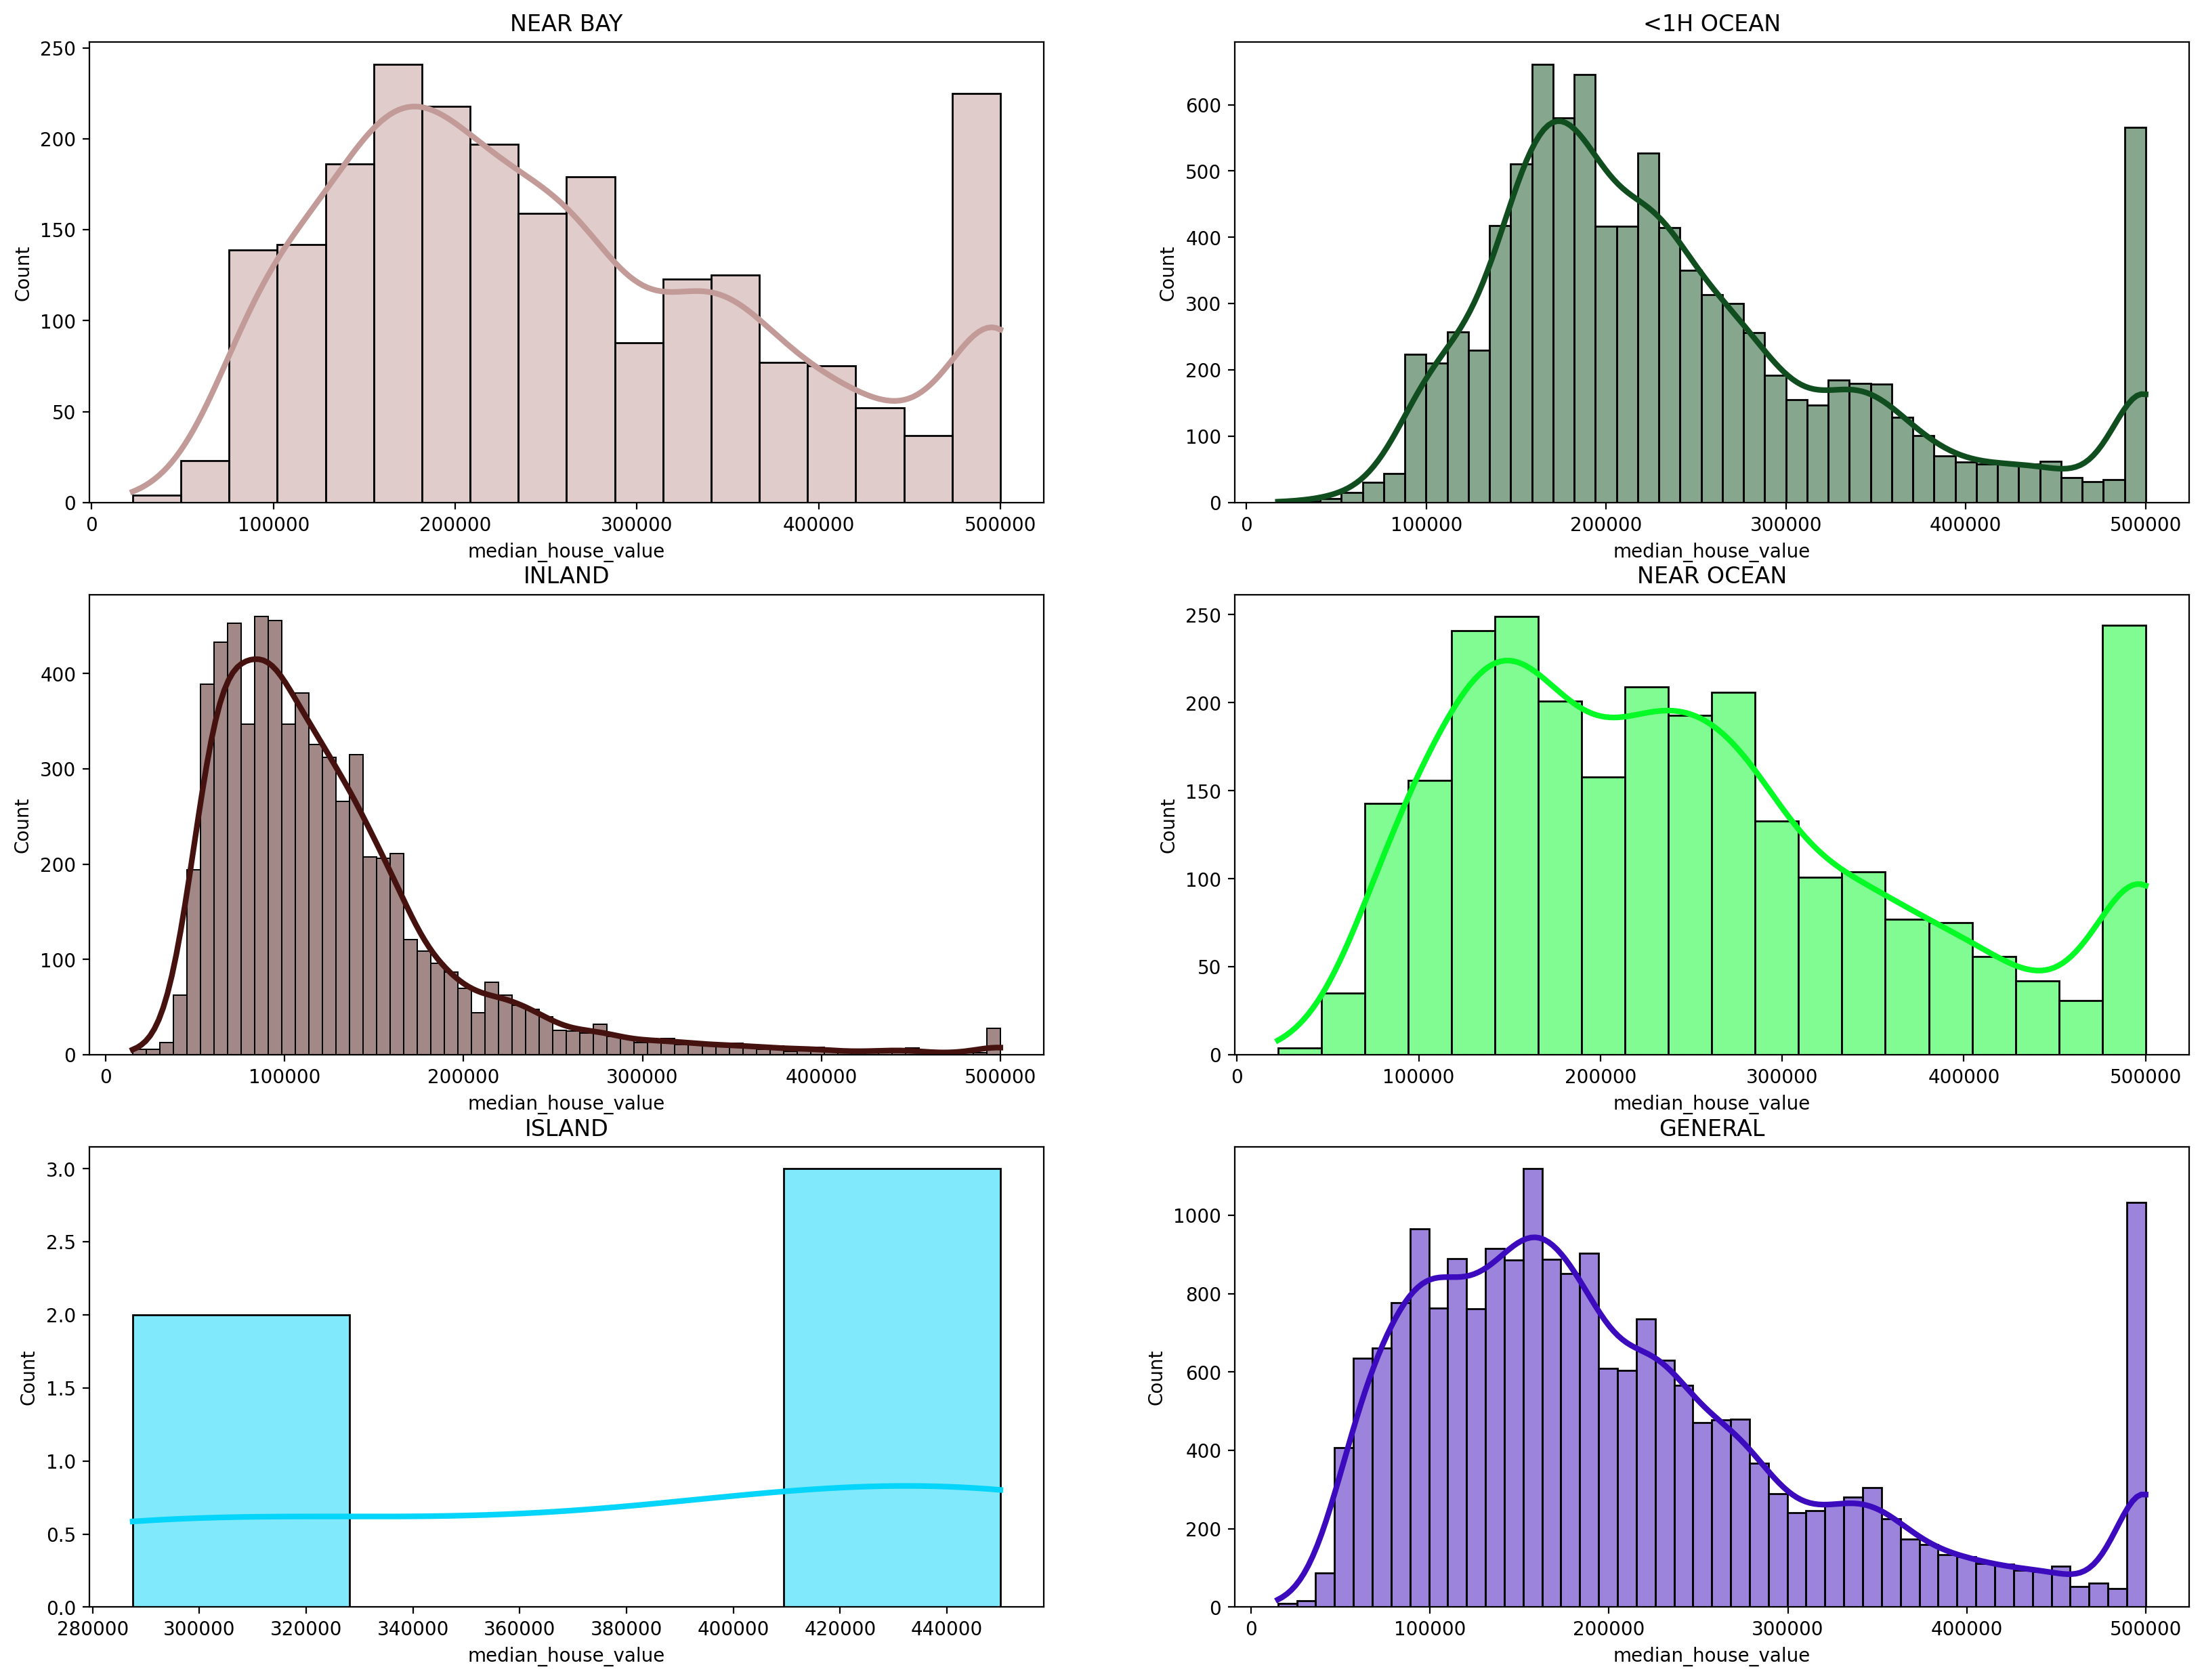

In [46]:
info_by_location(df_clean,'median_house_value')   

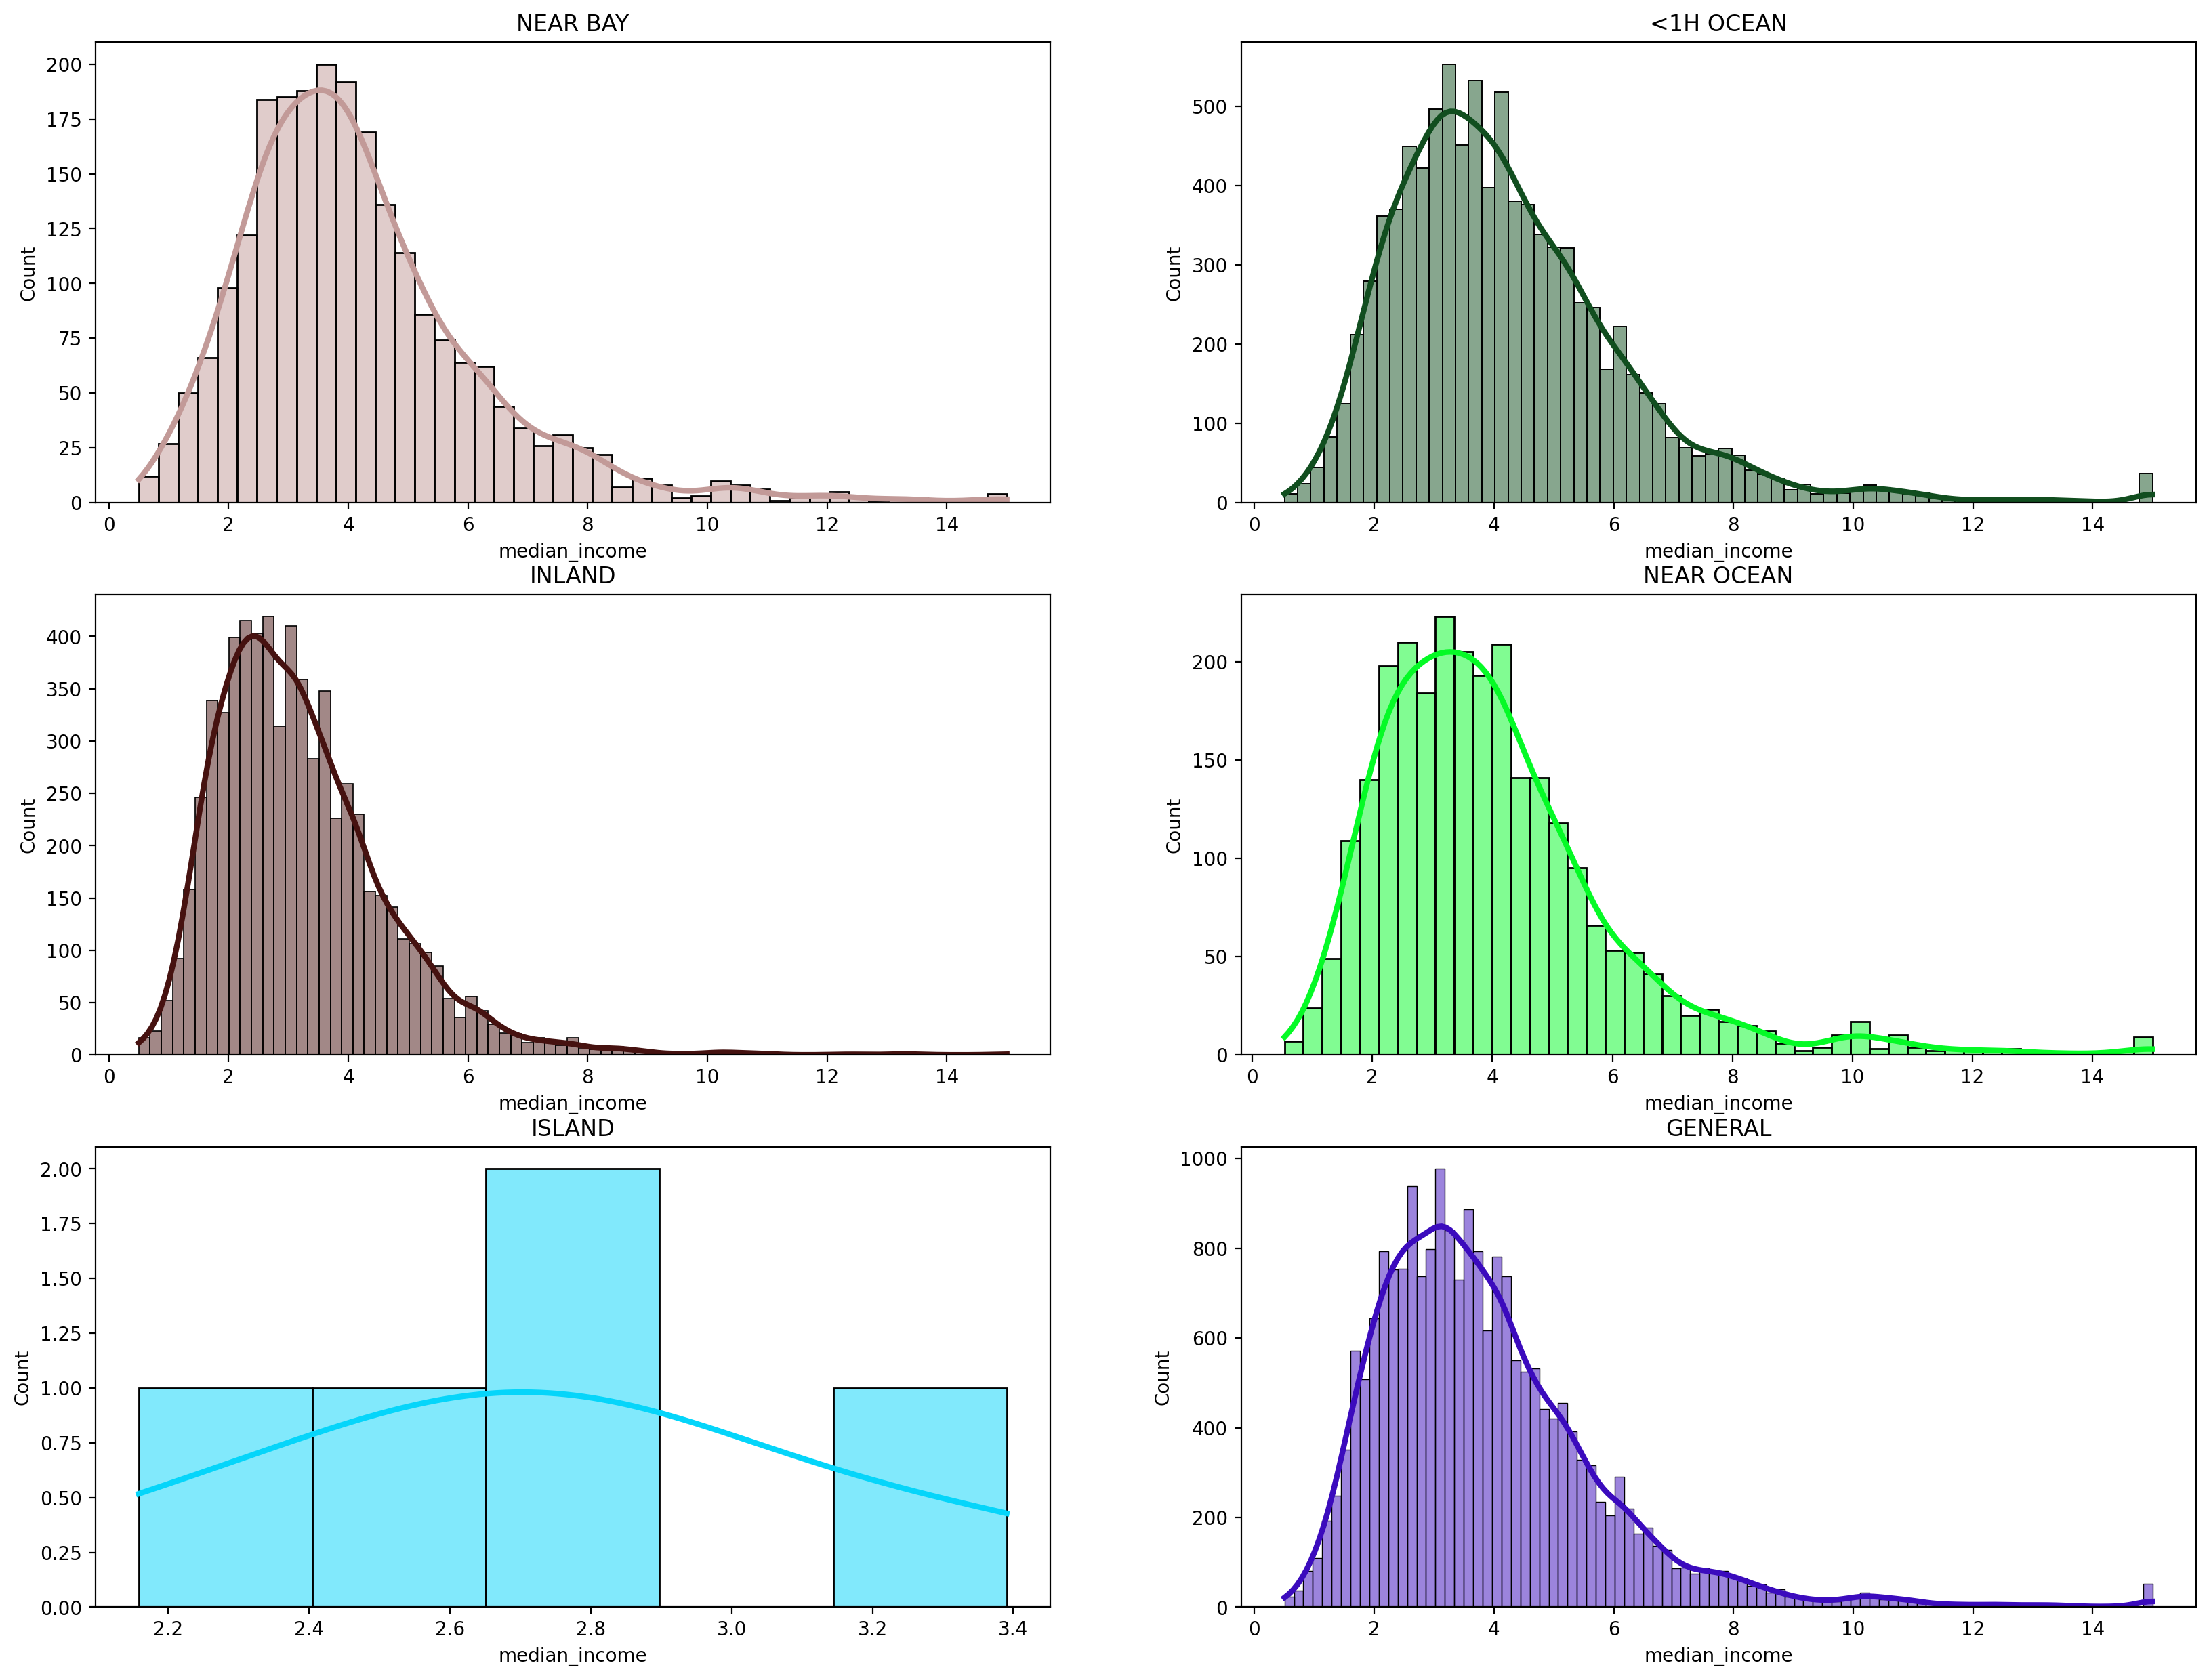

In [47]:
info_by_location(df_clean,'median_income')    

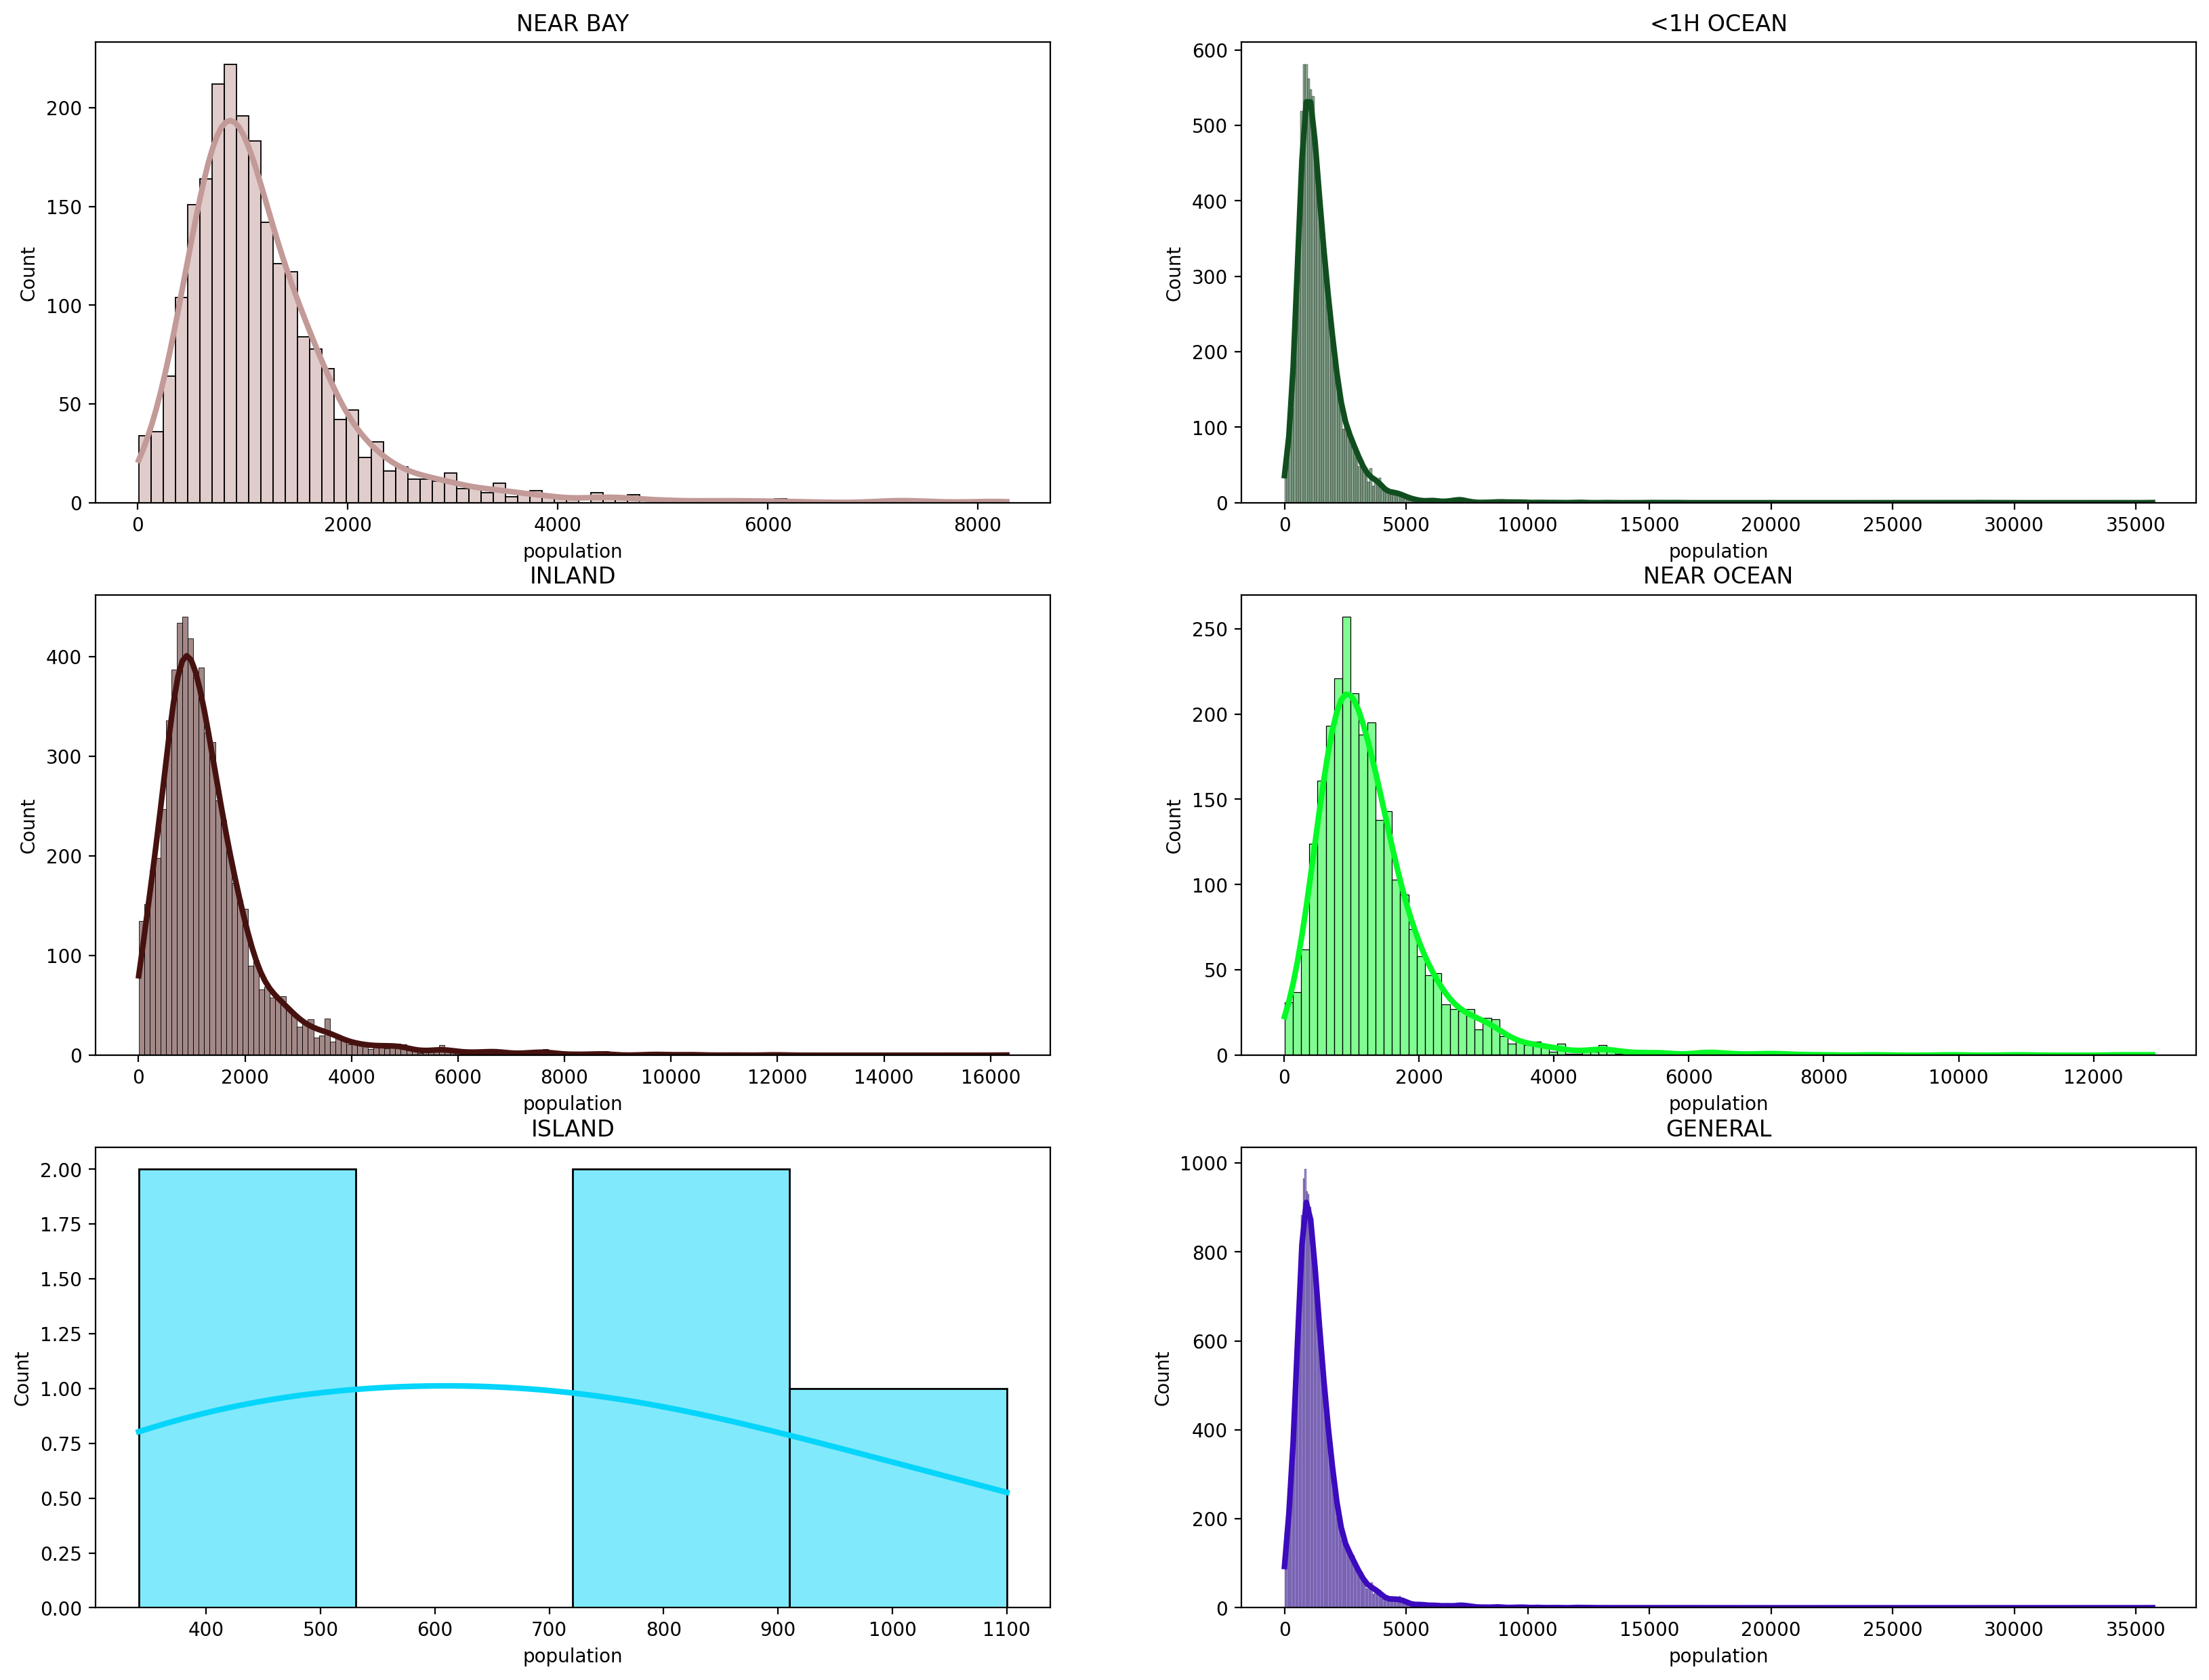

In [48]:
info_by_location(df_clean,'population')    

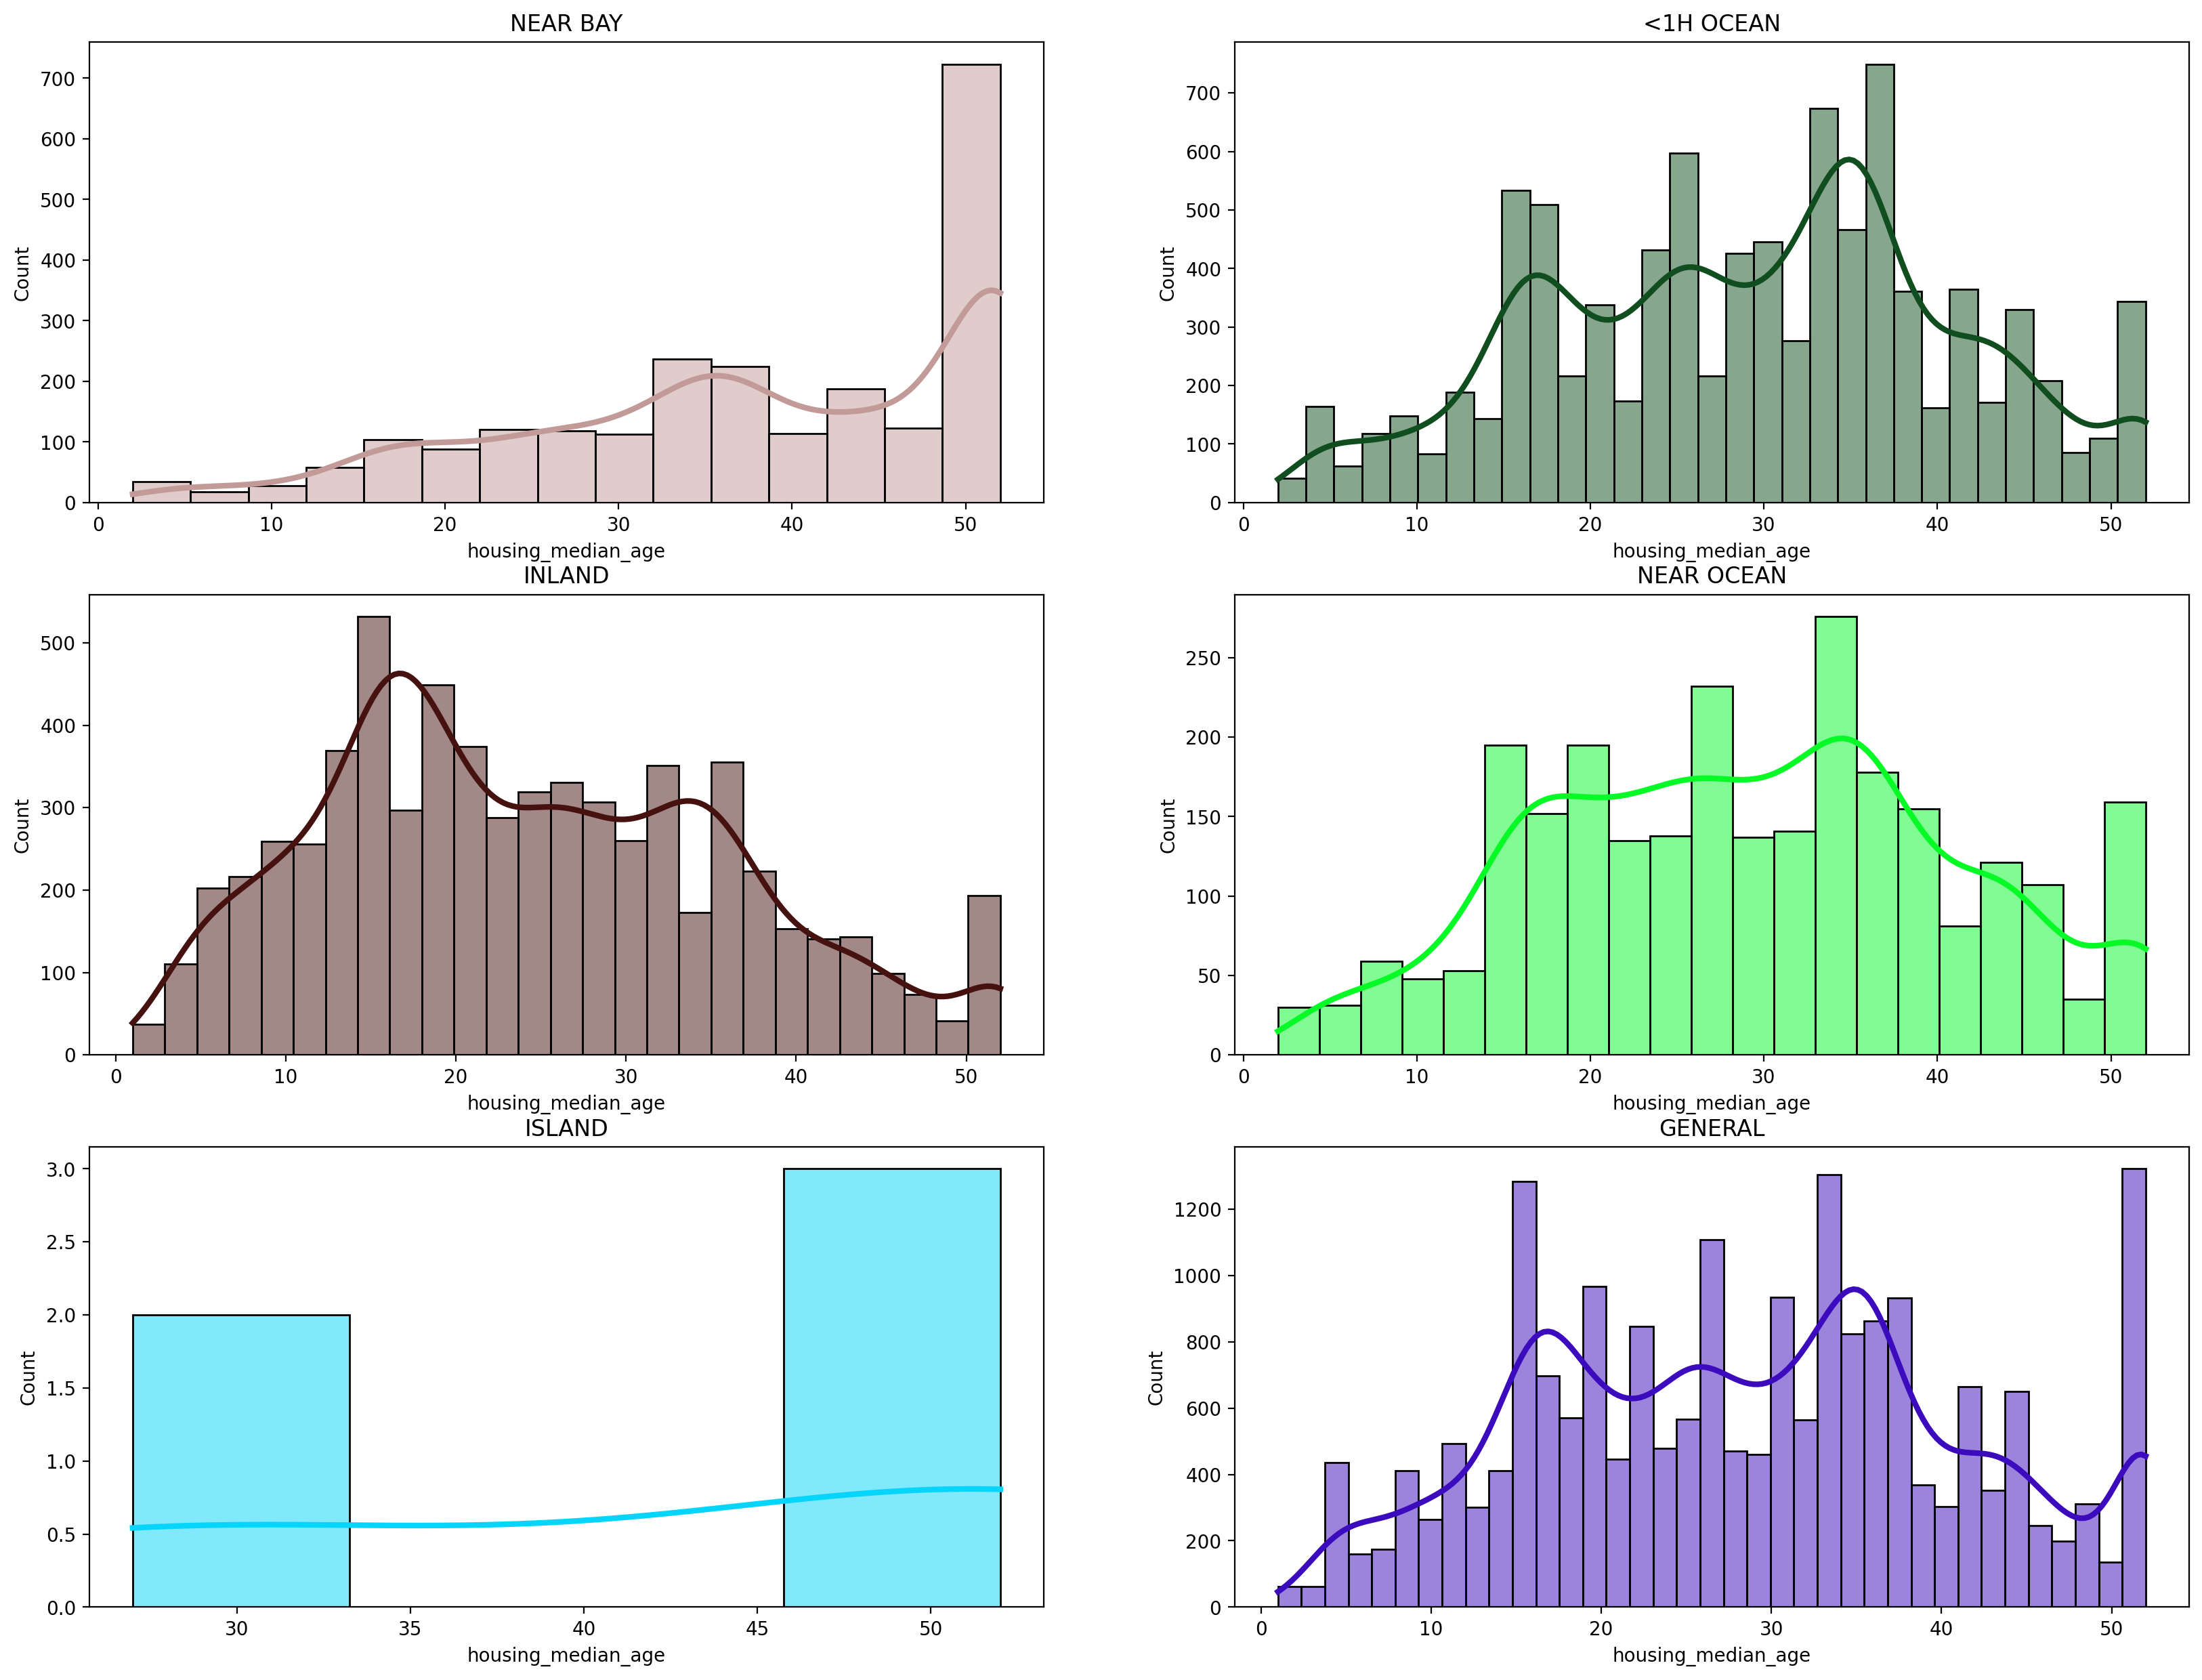

In [49]:
info_by_location(df_clean,'housing_median_age')

## <b> <span style="font-weight: 600; font-size: 48px;"> MODELING AND TUNING </span></b> 

In [50]:
df_ML.head()

longitude  latitude  housing_median_age  total_rooms  median_house_value  \
0    -122.23     37.88                41.0        880.0            452600.0   
1    -122.22     37.86                21.0       7099.0            358500.0   
2    -122.24     37.85                52.0       1467.0            352100.0   
3    -122.25     37.85                52.0       1274.0            341300.0   
4    -122.25     37.85                52.0       1627.0            342200.0   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0          0       0       0         1           0  
1          0       0       0         1           0  
2          0       0       0         1           0  
3          0       0       0         1           0  
4          0       0       0         1           0

Here I am demonstrating the distrubution of house values against increasing latitude and longtitude

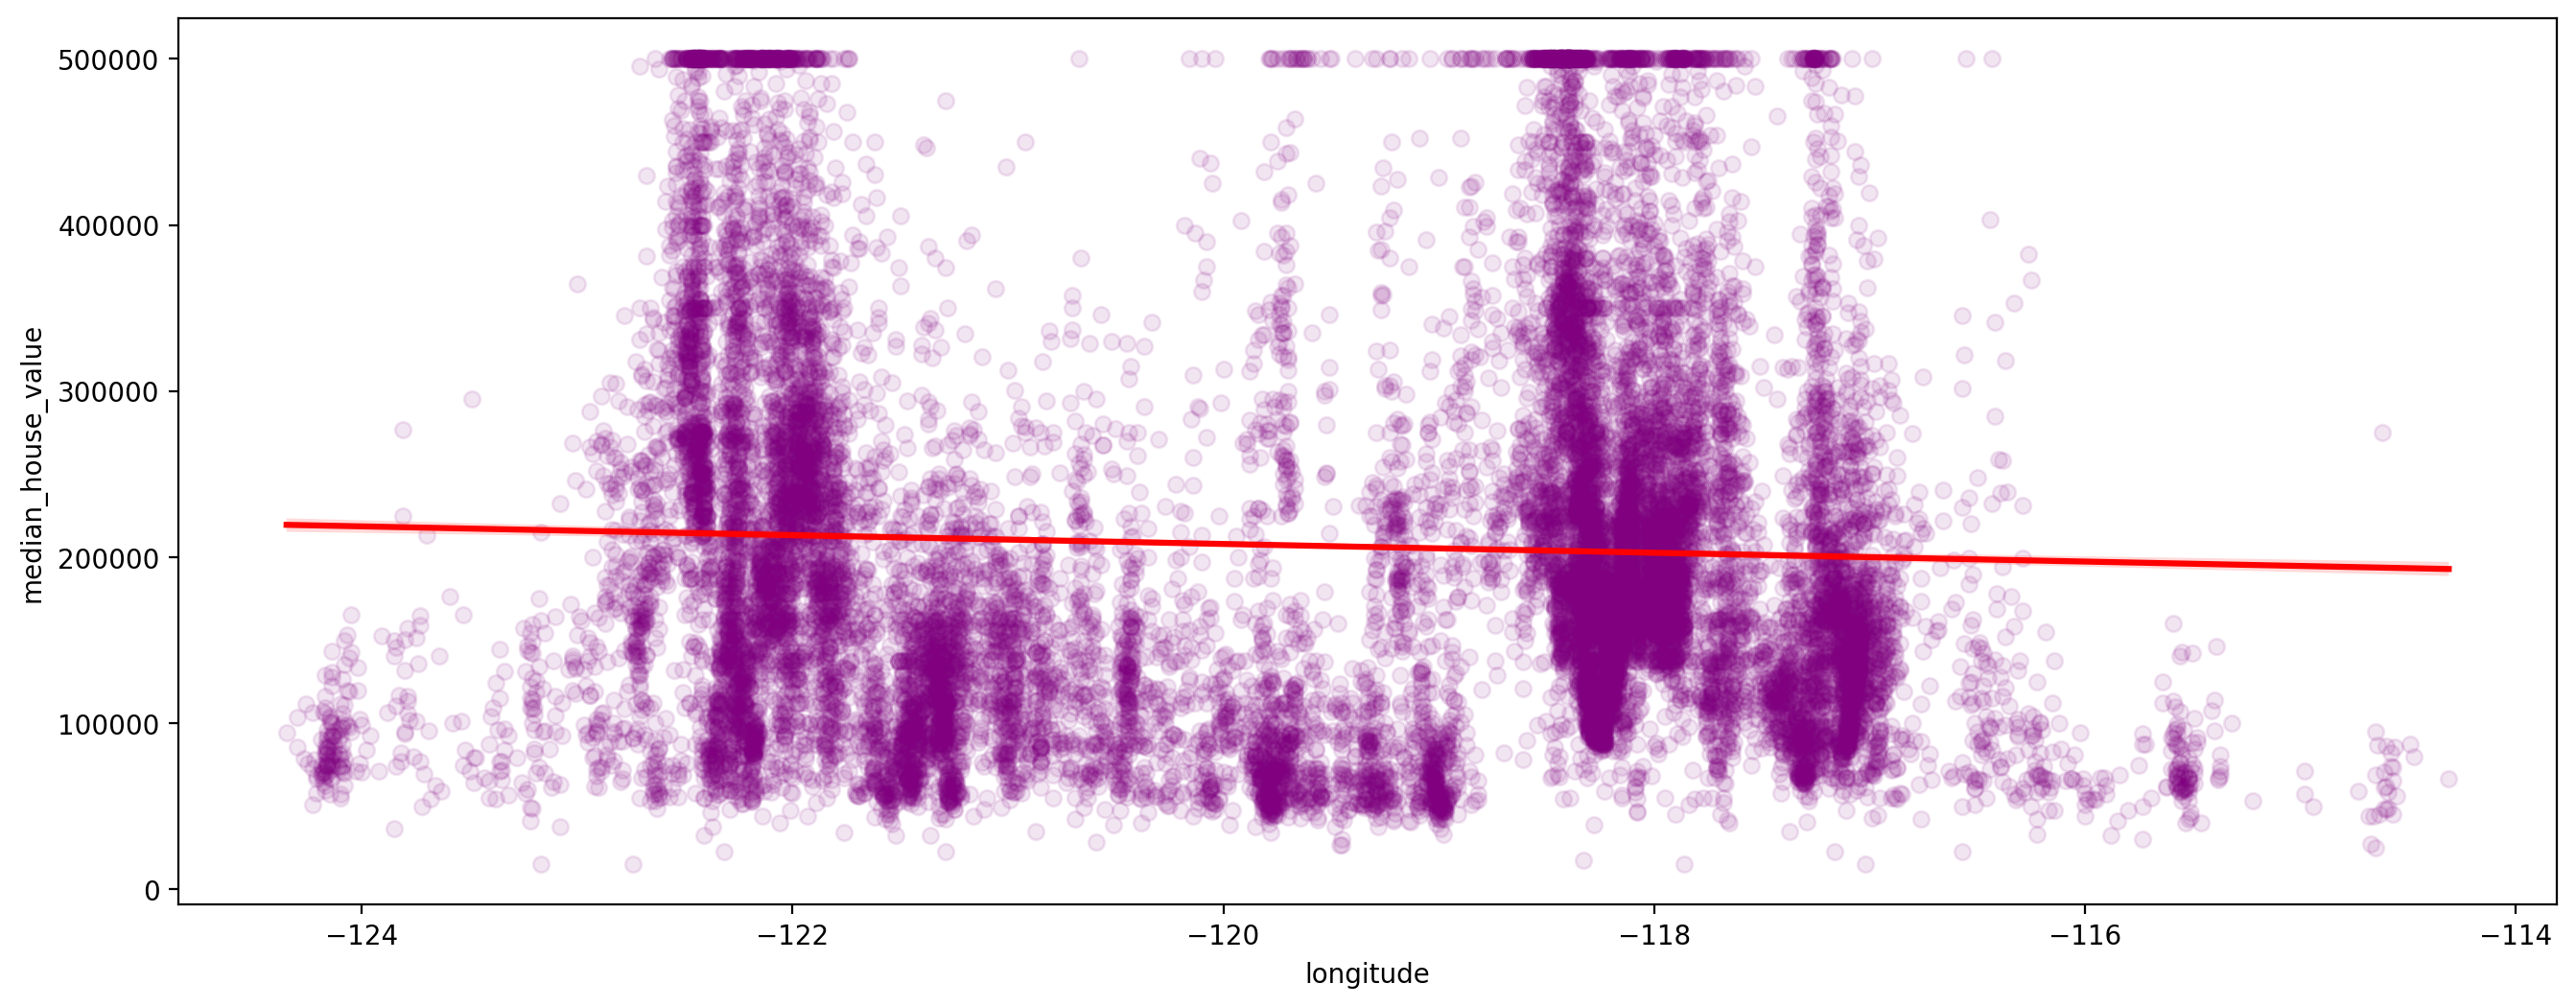

In [51]:
def regg_visiual(data,direction):    
    
    """
    Summary     :
        
        
        Demonstrates the regression plot of house values
        against increasing "direction" feature. 
        Direction can be latitude or longtitude reccommendedly.
    
    Args        :
        
        
        data(pd.DataFrame) : data frame that we will use 
        
        direction(string)  : Increasing feature that we will compare with house values.
        
    Returns     :
    
    
        Regression plot 
    """
    
    fig=plt.figure(figsize=(16,6))
    gs=GridSpec(nrows=1,ncols=1)

    ax0=fig.add_subplot(gs[0,0])
    sns.regplot(data=data, ax=ax0,x=direction,y='median_house_value',
                line_kws={"color": "red"},scatter_kws={"color": "purple", "alpha": 0.1})
    
    
regg_visiual(df_ML,'longitude')    

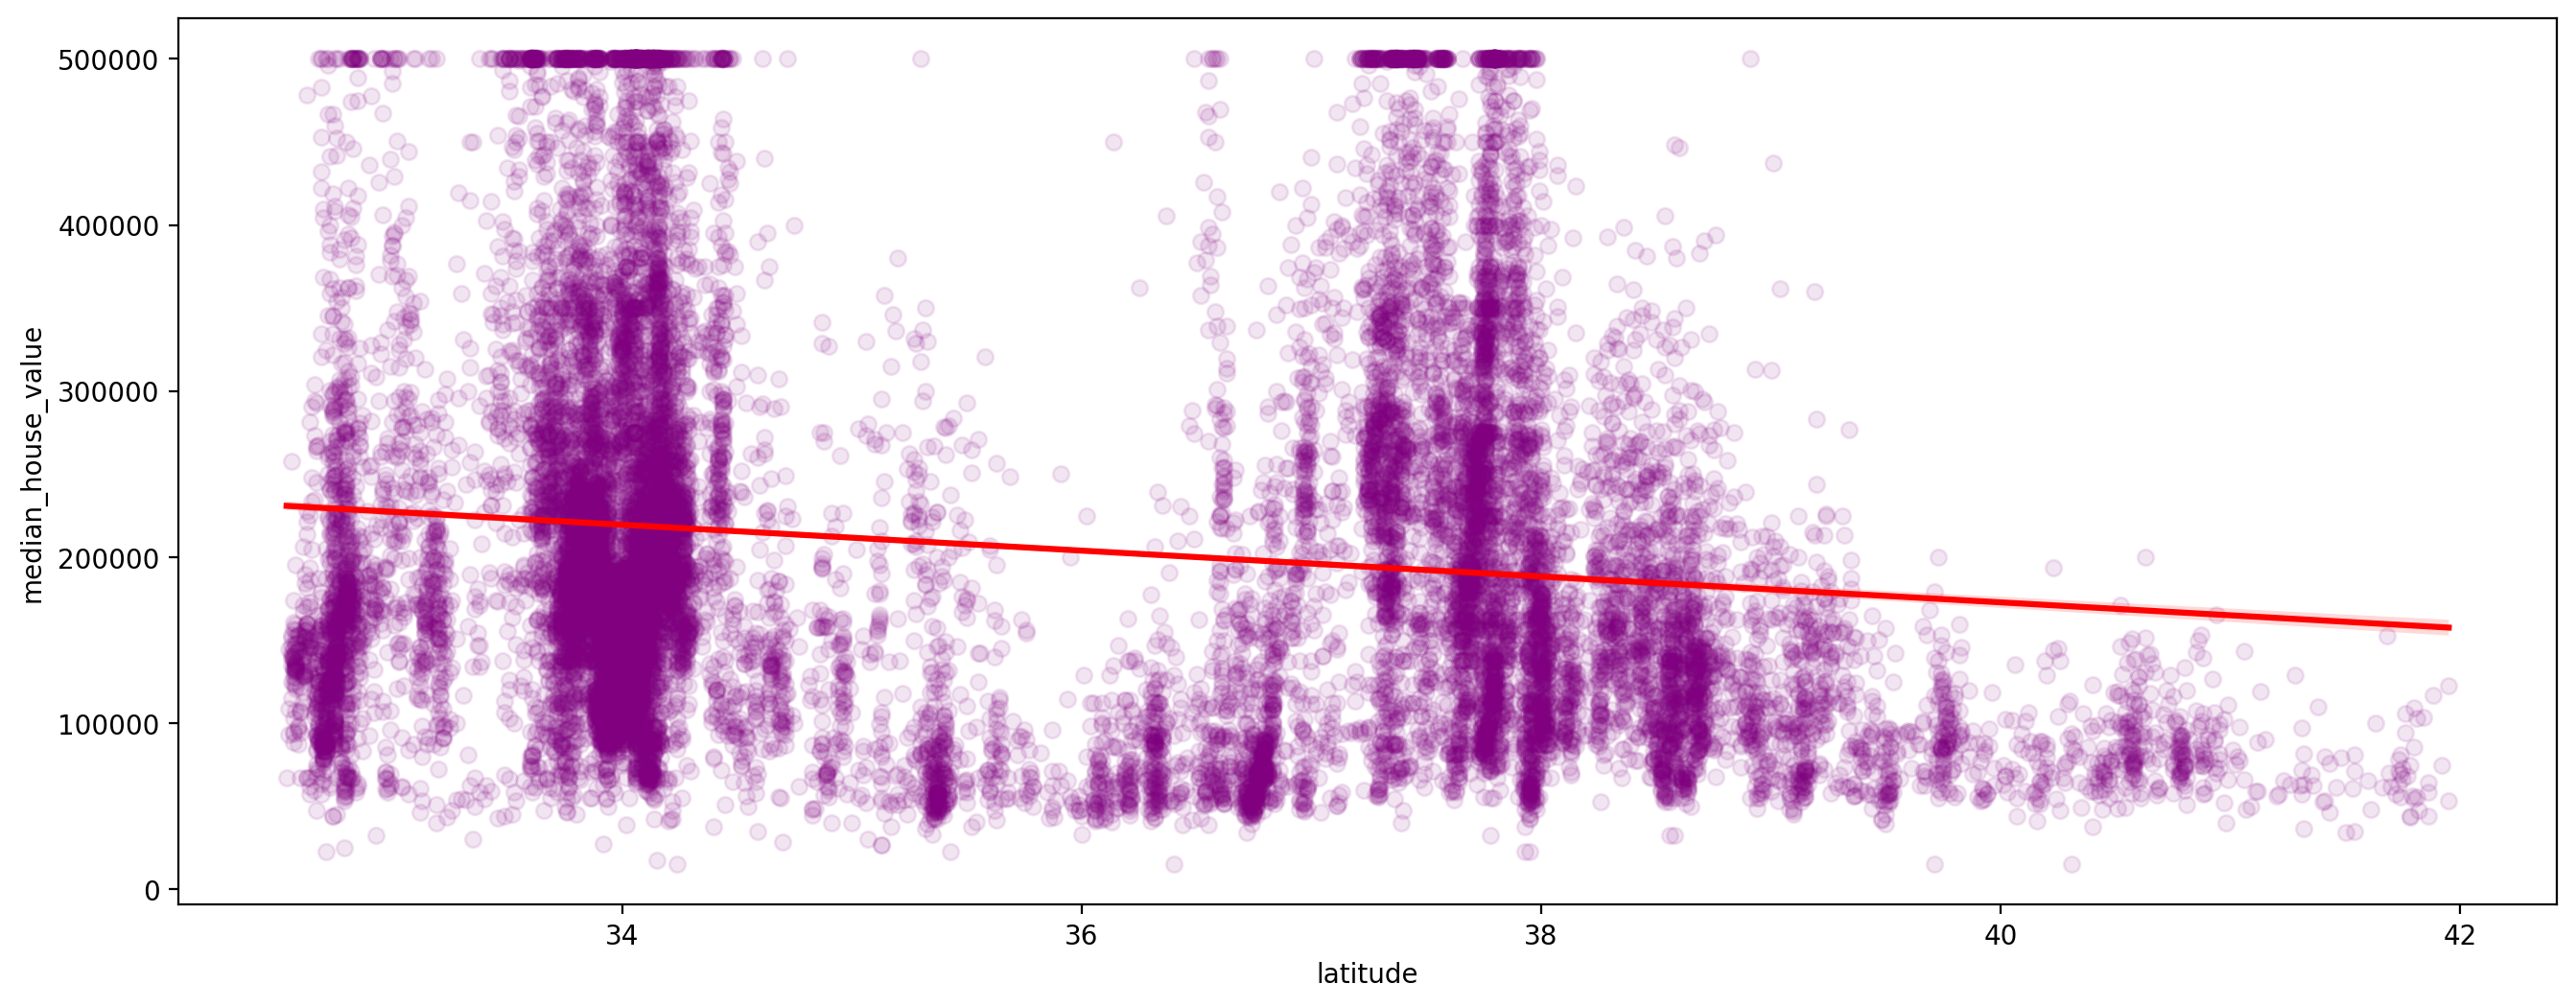

In [52]:
regg_visiual(df_ML,'latitude')

$$ \hspace{1cm}  $$
* I will split and scale the data to create more efficent machine learning model. Scaling the features will remove the dominancy problem among the features.

* Standart Scaling will be used for scaling. It determines the mean 0 with subtracting each spesific row's mean from each spesific row's values (i.e examples) and determines the standart deviation 1 with dividing each spesific row's each spesific values by standart deviation. The mathematical demonstration is like that :

$$ \huge\sum_{k=1}^{len(rows)}\Large\sum_{i=1}^{len(row_{k})} \small\frac{row_{ki} - \text{mean}(row_{k})}{\sigma_{k}} $$
$$ \hspace{1cm}  $$

In [53]:
def splitScale(data,target):
    
    """
    Summary :
    
        Splits and scales the data
    
    Args    :
    
        data(pd.DataFrame)    : Data to be splitted and scaled
    
    Returns :
        X_train(np.array) : Training data without y
        X_test(np.array)  : Test data without y
        y_train(np.array) : Training data's spesific column to predict
        y_test(np.array)  : Test data's spesific column to predict
        
    """
    X=data.drop([target],axis=1)
    y=data[target].values
    
    #Scaling the data
    scaler=StandardScaler()
    scaled_X=scaler.fit_transform(X)
    
    # We didn't scale Y because it has already binary numbers.
    X_train , X_test , y_train , y_test = train_test_split(scaled_X,y, test_size=0.2,random_state=42)
    
    return  X_train , X_test , y_train , y_test


X_train , X_test , y_train , y_test = splitScale(df_ML,'median_house_value')

In [54]:
print(X_train.shape,
      X_test.shape,
      y_train.shape, 
      y_test.shape)

(16512, 9) (4128, 9) (16512,) (4128,)


$$ \hspace{0.0001cm}  $$
### <b> <span style="font-weight: 700; font-size: 30px;">linear regression model prediction formula :</span></b>
$\LARGE y = \theta_0 + \theta_1x_1 + \theta_2x_2 + .....   \theta_nx_n$
$$ \hspace{0.0001cm}  $$
### <b> <span style="font-weight: 700; font-size: 30px;">In vectorized form :</span></b>
$\LARGE y = h_\theta(x) = \Theta.x$
$$ \hspace{0.0001cm}  $$

In [55]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
print(linreg.fit(X_train, y_train))

LinearRegression()


In [56]:
# Coefficents (theta values)
linreg.coef_

array([-8.32054384e+04, -8.25827661e+04,  2.89922777e+03,  1.83766194e+04,
       -1.77184246e+17, -1.66041446e+17, -5.55149382e+15, -1.12036207e+17,
       -1.19486573e+17])

In [57]:
# Constant or bias (theta0)
linreg.intercept_

206878.4437378876

In [58]:
# Testing our linear regression model on the testing data
y_pred = linreg.predict(X_test)
print(y_pred)

[110776.13611722 178264.13611722 281752.13611722 ... 278584.13611722
 125432.13611722 223832.13611722]


In [59]:
y_train_pred=linreg.predict(X_train)

That is very less accuracy i will tune it's hyperparamaters and do my best

In [60]:
# Accuracy of the model with r square notation
print("Accuracy on the training data    :",metrics.r2_score(y_train,y_train_pred))
print("Accuracy on the test data        :",metrics.r2_score(y_test,y_pred))

Accuracy on the training data    : 0.29060865999421104
Accuracy on the test data        : 0.30012272305902


In [61]:
# These are the likeli hyperparameters in the linear regression model to find the best
param_grid = {'alpha': np.arange(0,5,0.1),
              'max_iter': [50,80,100,120,150]}

In [62]:
from sklearn import linear_model

lasso_model= linear_model.Lasso()

lasso_reg = GridSearchCV(lasso_model,param_grid=param_grid,cv=5)

In [63]:
print(lasso_reg.fit(X_train,y_train))


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'max_iter': [50, 80, 100, 120, 150]})


In [64]:
best_model=lasso_reg.best_estimator_


In [65]:
y_pred=best_model.predict(X_test)
y_train_pred=best_model.predict(X_train)

In [66]:
print("Accuracy on the training data    :",metrics.r2_score(y_train,y_train_pred))
print("Accuracy on the test data        :",metrics.r2_score(y_test,y_pred))

Accuracy on the training data    : 0.2906011518338414
Accuracy on the test data        : 0.3001717671980396


$$ \hspace{0.0001cm}  $$
$\Rightarrow$ Linear Regression can't predict well because of the less feature existence and less collinearity
among the features.
$$ \hspace{0.0001cm}  $$
$\Rightarrow$  Those situations will affect all algorithms badly but, i will do my best !
$$ \hspace{0.0001cm}  $$

Now, I will try XGBOOST Regressor

In [67]:
xgb=XGBRegressor()

#Here are the candidates of best hyperparameters i will do cross-validation to choose best
parameters={
    'learning_rate':np.arange(0,1,0.3),
    'gamma':np.arange(30000,70000,10000),
    'max_depth':np.arange(3,15,3)
}

I am making cross validation with taking a sample that consists 5 elements from the data and trying hyperparameters to determine
which is best

In [68]:

regressor=GridSearchCV(xgb,parameters,cv=5)


In [69]:
print(regressor.fit(X_train,y_train))


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [70]:
# I am choosing the best hyperparameters
reg_best=regressor.best_params_

reg_best

{'gamma': 30000, 'learning_rate': 0.3, 'max_depth': 9}

In [71]:
best_model=regressor.best_estimator_

y_pred=best_model.predict(X_test)
y_train_pred=best_model.predict(X_train)

We have %77 accuracy on the test data !

In [72]:
print("Accuracy on the training data    :",metrics.r2_score(y_train,y_train_pred))
print("Accuracy on the test data        :",metrics.r2_score(y_test,y_pred))

Accuracy on the training data    : 0.9579749744920101
Accuracy on the test data        : 0.7702191874521392


I will create a pivot table respect to predicted values and actual values

In [73]:
predict=pd.DataFrame()

# Test data and predicted data are concatenated
values=np.concatenate((y_test,y_pred))

def distinctor(undistinguished,target):
    
    """
    Summary :
        
                          Distinguishes the predicted and target values with 
                          basic if/else statements


    Args    :
    
        undistinguished : undistinguished group of predicted and actual 
                          values
        
        target          : Predicted or actual values group, target list members
                          will be determined as 1 in the group1.
                          

    Returns :

        group1(list)    : Identites of predicted and real values 
                          as 0 and 1, identites are dependent to
                          target argument.
        
    """
    
    
    group1=[]
    for i in undistinguished: 
        if i in target:
            group1.append(1)
        else: 
            group1.append(0)    
    return group1



print(values,"\n",y_test,y_pred)

#Indexes
predict['x']=[*range(len(values))]

#Concataneted list that consists either predicted and actual values.
predict['values']=values


predict['predicted']=distinctor(predict['values'],y_pred)


predict

[ 47700.         45800.        500001.        ... 401678.75
  59237.1328125 171128.       ] 
 [ 47700.  45800. 500001. ... 500001.  72300. 151500.] [ 56315.72   66548.22  510407.5   ... 401678.75   59237.133 171128.   ]


x         values  predicted
0        0   47700.000000          0
1        1   45800.000000          0
2        2  500001.000000          0
3        3  218600.000000          0
4        4  278000.000000          0
...    ...            ...        ...
8251  8251  183137.218750          1
8252  8252  237831.687500          1
8253  8253  401678.750000          1
8254  8254   59237.132812          1
8255  8255  171128.000000          1

[8256 rows x 3 columns]

In [74]:
# I created our pivot table but there are some missing values since half of the examples have not 0
# half the examples have not 1 in their predicted column, i will adjust it
pivot_predict=pd.pivot_table(data=predict,index='predicted',values='values',columns='x')

# Removed NaN on the right and the other NaN values that are in left corner are filled with predicted values to
# get the table that we wanted.
pivot_predict=pivot_predict.iloc[0:,:4128]
pivot_predict.iloc[1,:]=y_pred
pivot_predict

x                 0            1         2          3             4     \
predicted                                                                
0          47700.00000  45800.00000  500001.0  218600.00  278000.00000   
1          56315.71875  66548.21875  510407.5  236493.75  308792.03125   

x                   5              6           7              8         9     \
predicted                                                                      
0          158700.000000  198200.000000  157500.000  340000.000000  446600.0   
1          129688.867188  188387.671875  171951.875  224124.140625  423780.0   

x          ...      4118           4119          4120      4121  \
predicted  ...                                                    
0          ...  433800.0   72900.000000  108500.00000  452600.0   
1          ...  487183.5  117911.679688  132960.46875  335092.5   

x                   4122          4123         4124       4125          4126  \
predicted                                                                      
0          467600.000000  263300.00000  266800.0000  500001.00  72300.000000   
1          215150.078125  183137.21875  237831.6875  401678.75  59237.132812   

x              4127  
predicted            
0          151500.0  
1          171128.0  

[2 rows x 4128 columns]

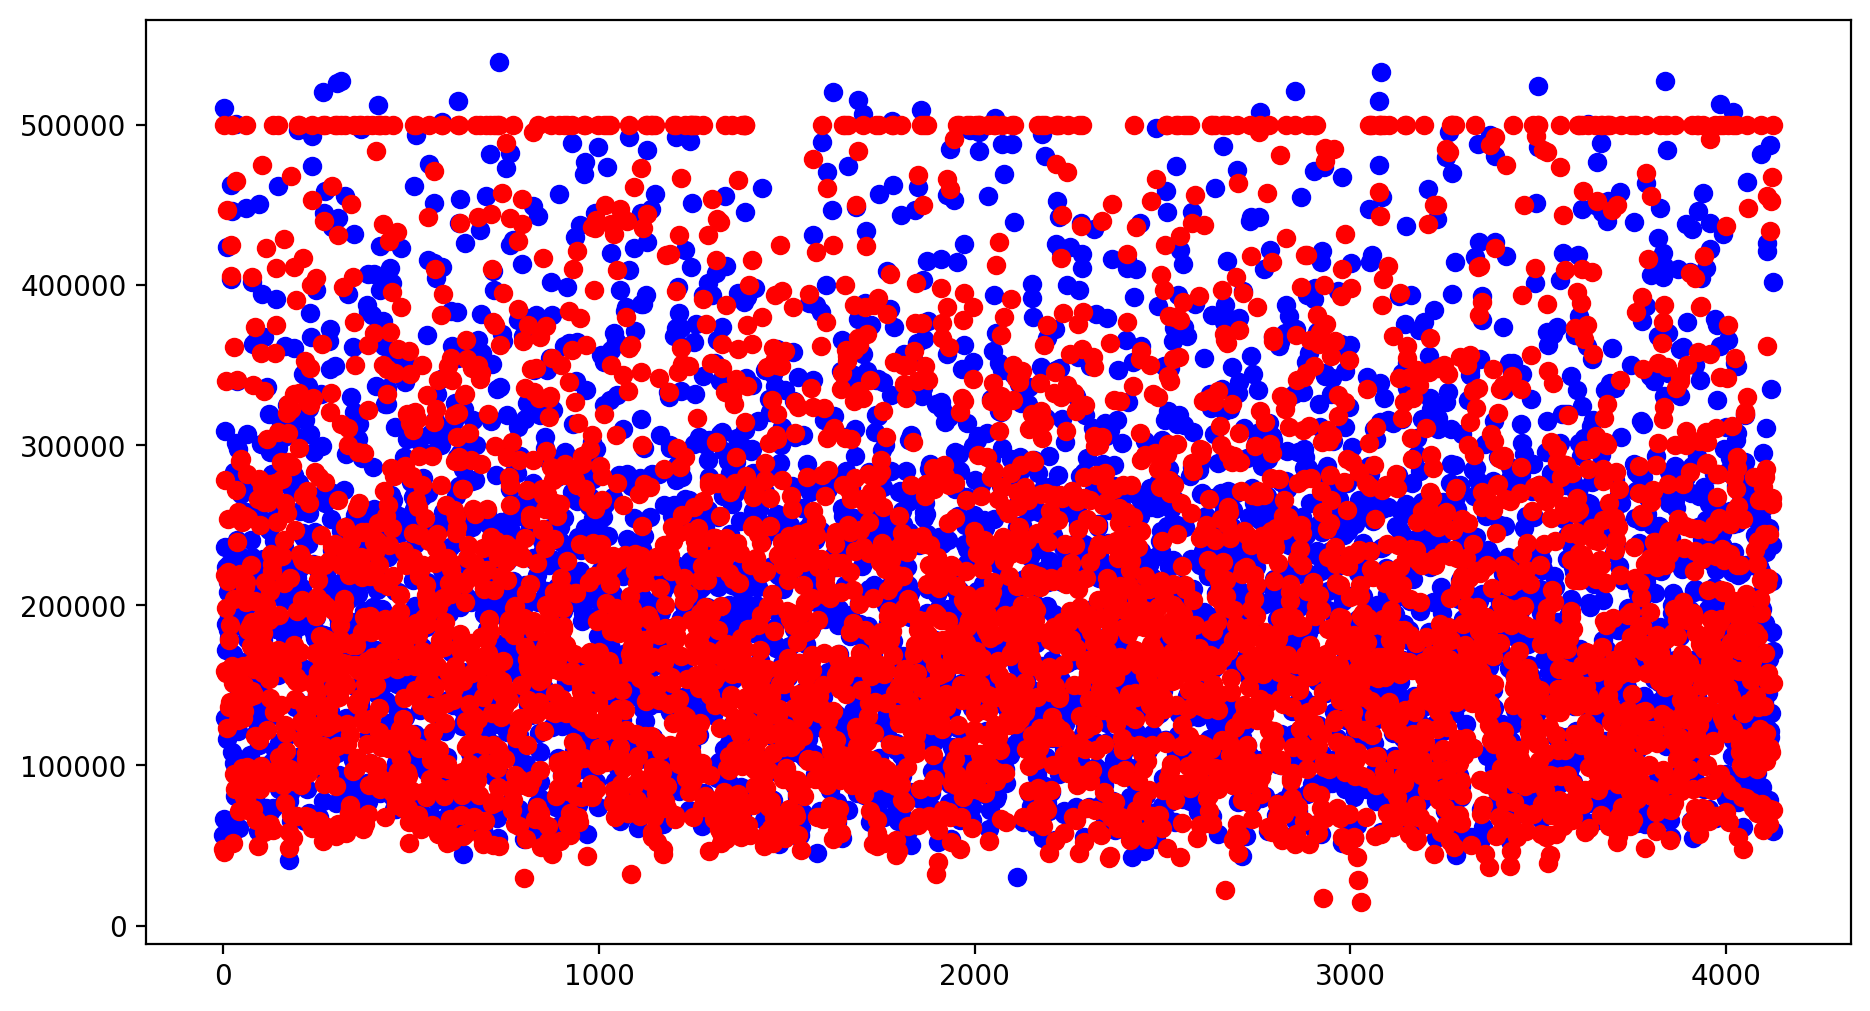

In [75]:
#Demonstration of predicted values and actual values

fig,ax=plt.subplots(figsize=(11,6))
plt.scatter(x=[*range(len(pivot_predict.columns))],y=pivot_predict.iloc[1,:],c='blue')
plt.scatter(x=[*range(len(pivot_predict.columns))],y=pivot_predict.iloc[0,:],c='red')

## <b> <span style="font-weight: 600; font-size: 42px;"> CONCLUSION AND HYPOTHESIS TESTING </span></b> 

$\hspace{1cm}$

$\Rightarrow$ I created a machine learning model and it can predic house values respect to it's feature with approximately 0.77 accuracy.

$\hspace{1cm}$

$\Rightarrow$  The houses that are the most expensive and have the most income are located 1 hour away from the ocean, and these houses' population is also higher, we can infer that rich people have extended family, so my hypothesis is true !

